## **Linear Regression**

Linear Regression is the easiest and most widely used machine learning algorithm for analysing continuous data.
Suppose we are given data $\mathcal{D} = \{(x_1, y_1),(x_2,y_2),...,(x_N,y_N)\}$, 
We can consider this as a linear regression problem using the formulation,

$y = x^T\theta + \epsilon,       \epsilon\sim \mathcal{N}(0,\sigma^2)$. <br>
where;<br>
 x is the observation,  <br> y is the target,  <br> $\theta$ is the parameter and <br> $\epsilon$ is the offset or bias
<br>Our tasks are to:<br>
1.  Find a good set of parameters $\theta$ using the Maximum Likelihood estimate (MLE)
2.  Make inference or predictions with the parameter $\theta$

## **MLE**

Maximum Likelihood Estimation
Lets briefly look at MLE. This is by way of finding the parameters that maximizes the likelihood. 

And we do this by minimizing the loss (Mean-square error for Linear Regression) which is the distance of each datapoint from the line drawn through the line (hyperplane) of best fit. <br>

The likelihood can be written as <br>$p(y|x,\theta) = \prod^{N}_{n=1}p(y_n|x_n,\theta)$<br>
And the maximum likelihood estimator is given by;<br>
$\theta^{ML} = (x^Tx)^{-1}x^Ty$     for $x\in\mathbb{R}^{NxD}, y\in \mathbb{R}^N$

---



In [0]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

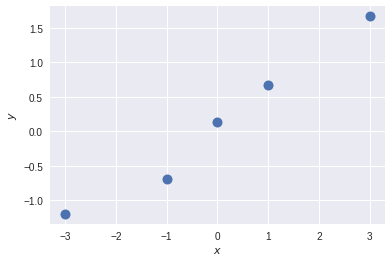

In [0]:
# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, 'o', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [0]:
def MLE(x, y):
    
  """  X: N x D matrix of training inputs
    y: N x 1 vector of training targets/observations
    output: D x 1 mle parameters 
    """
  N, D = x.shape
  
  theta_ml = np.zeros((D,1)) 
  
  theta_ml =  None #TODO: complete this line
  return theta_ml

In [0]:
def MLE_predict(xnew, theta_ml):
    """
    Xtest: K x D matrix of test inputs
    theta: D x 1 vector of parameters
    output: K x 1 prediction
    """
    
    K, D = xnew.shape
    
    pred = np.zeros((K,1))
    pred = None #TODO: complete this line
    return pred 

In [0]:
def MSE(y, ypred):
  """
  y, ypred : K x 1  target, prediction
  output : scalar Mean squared error
  """
  mse = 0
  K = y.shape[0]
  for k in range(K):
    mse += None # TODO: complete this line
  return 

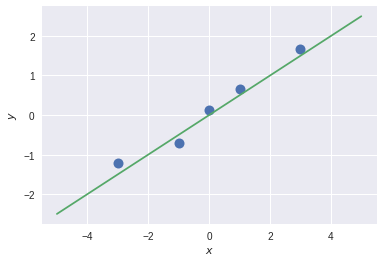

In [0]:
x_test = np.linspace(-5,5,100).reshape(-1,1)
theta_ml = #TODO
ypred = #TODO

#Visualise 
plt.figure()
plt.plot(X, y, 'o', markersize=10)
plt.plot(x_test, prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

Now we have an idea how to find the MLE parameter and how to make predictions on data. Lets extend this onto a larger dataset. 

In [0]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
diabetes = datasets.load_diabetes()
x = diabetes.data[:,None,2]
xtrain = x[:-20]
xtest = x[-20:]
ytrain = diabetes.target[:-20,None]
ytest = diabetes.target[-20:,None]


In [0]:
print("xtrain shape ", xtrain.shape,
      "\nxtest shape ", xtest.shape, 
      "\nytrain shape ", ytrain.shape,
      "\nytest shape ", ytest.shape)

xtrain shape  (422, 1) 
xtest shape  (20, 1) 
ytrain shape  (422, 1) 
ytest shape  (20, 1)


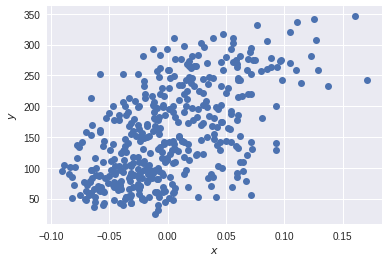

In [0]:
plt.figure()
plt.plot(xtrain, ytrain, 'o')
plt.xlabel("$x$")
plt.ylabel("$y$");

Parameter value:  [[970.16723129]]
Mean square Error loss:  [20687.81402365]


Text(0, 0.5, '$y$')

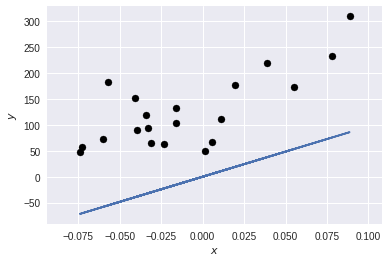

In [0]:
#x_test = np.linspace(0,1,20).reshape(-1,1)
theta_ml = MLE(xtrain, ytrain)
ypred = MLE_predict(xtest, theta_ml)
mse = MSE(ytest, ypred)
print("Parameter value: ", theta_ml)
print("Mean square Error loss: ", mse)

plt.figure()
plt.scatter(xtest, ytest,  color='black')
plt.plot(xtest, ypred)
plt.xlabel("$x$")
plt.ylabel("$y$")

Questions: <br>
1. What do you observe?
2. Does the plane fall in the right position? If not, what do you suggest we do?
3.  Lets discuss and implement our idea.

Lets try the same data using sklearn. Hope this gives us an idea what to do next.

Parameter weight:  [[938.23786125]]
Mean squared error:  2548.0723987259694


Text(0, 0.5, '$y$')

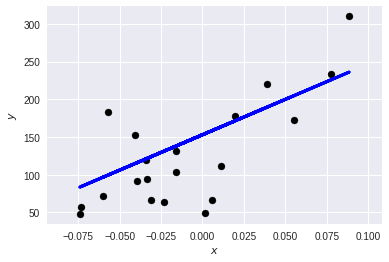

In [0]:
# Lets try the same data with Sklea
lr = linear_model.LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

# The coefficients
print('Parameter weight: ',lr.coef_)
# The mean squared error
print("Mean squared error: ", mean_squared_error(ytest, ypred))

#Visualise
plt.figure()
plt.scatter(xtest, ytest,  color='black')
plt.plot(xtest,ypred, color='blue', linewidth=3)
plt.xlabel("$x$")
plt.ylabel("$y$")

All along, we've been working with only data in one dimension (K = 1). Can we extend this to two or more dimension? ( K > 1). <br>
We can do this by reshaping the Diabetes dataset above such that the second dimension is greater than 1. Start a new cell and work below